# Initial analysis of MPNS v8 datasets

And reformatting to comma-separated CSVs.

In [86]:
import pandas as pd
import missingno as msno
from typing import List

In [34]:
# Notebook setup
pd.set_option('display.max_colwidth', None)

In [68]:
# Functions
def retrieve_col_names(filepath: str, delimiter: str) -> List:
    with open(filepath, "r") as f:
        col_names = f.readline().split(delimiter)
        col_names = list(map(str.strip, col_names))
    return col_names


## MPNS Plants (Table 1)

In [102]:
# Retrieve field names in pipe-delimited csv
mpns_plants_filepath = "../../../data/mpns-v8/medicinal_mpns_plants.csv"
mpns_plants_col_names = retrieve_col_names(filepath=mpns_plants_filepath, delimiter="|")

# mpns_plants_col_names

Column names:

 - name_id
 - ipni_id
 - taxon_status
 - quality_rating
 - rank
 - family
 - genus
 - genus_hybrid
 - species
 - species_hybrid
 - infra_species
 - parent_author
 - primary_author
 - full_scientific_name

In [61]:
mpns_plants_df = pd.read_csv(mpns_plants_filepath, header=0, sep="|", names=mpns_plants_col_names)
mpns_plants_df.head(10)

,name_id,ipni_id,taxon_status,quality_rating,rank,family,genus,genus_hybrid,species,species_hybrid,infra_species,parent_author,primary_author,full_scientific_name
0,gccgcc-97400,173608-1,Accepted,M,species,Asteraceae,Aaronsohnia,NaN,factorovskyi,NaN,NaN,NaN,Warb. & Eig,Aaronsohnia factorovskyi Warb. & Eig
1,wcsCmp609316,1020872-2,Accepted,M,species,Fabaceae,Abarema,NaN,cochliacarpos,NaN,NaN,Gomes,Barneby & J.W.Grimes,Abarema cochliacarpos (Gomes) Barneby & J.W.Grimes
2,wcsCmp609344,989363-1,Accepted,M,var.,Fabaceae,Abarema,NaN,jupunba,NaN,trapezifolia,Vahl,Barneby & J.W.Grimes,Abarema jupunba var. trapezifolia (Vahl) Barneby & J.W.Grimes
3,wcsCmp609343,469538-1,Accepted,M,species,Fabaceae,Abarema,NaN,jupunba,NaN,NaN,Willd.,Britton & Killip,Abarema jupunba (Willd.) Britton & Killip
4,wcsCmp609550,557984-1,Accepted,M,species,Malvaceae,Abelmoschus,NaN,angulosus,NaN,NaN,NaN,Wall. ex Wight & Arn.,Abelmoschus angulosus Wall. ex Wight & Arn.
5,wcsCmp609559,945720-1,Accepted,M,species,Malvaceae,Abelmoschus,NaN,caillei,×,NaN,A.Chev.,Stevels,Abelmoschus × caillei (A.Chev.) Stevels
6,wcsCmp609567,557999-1,Accepted,M,species,Malvaceae,Abelmoschus,NaN,crinitus,NaN,NaN,NaN,Wall.,Abelmoschus crinitus Wall.
7,wcsCmp609574,558006-1,Accepted,H,species,Malvaceae,Abelmoschus,NaN,esculentus,NaN,NaN,L.,Moench,Abelmoschus esculentus (L.) Moench
8,wcsCmp609577,558009-1,Accepted,M,species,Malvaceae,Abelmoschus,NaN,ficulneus,NaN,NaN,L.,Wight & Arn.,Abelmoschus ficulneus (L.) Wight & Arn.
9,wcsCmp609593,60463346-2,Accepted,M,var.,Malvaceae,Abelmoschus,NaN,manihot,NaN,pungens,Roxb.,Hochr.,Abelmoschus manihot var. pungens (Roxb.) Hochr.


In [32]:
mpns_plants_df.shape

(36981, 14)

In [33]:
mpns_plants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36981 entries, 0 to 36980
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name_id               36981 non-null  object
 1   ipni_id               33147 non-null  object
 2   taxon_status          36981 non-null  object
 3   quality_rating        36981 non-null  object
 4   rank                  36980 non-null  object
 5   family                36979 non-null  object
 6   genus                 36981 non-null  object
 7   genus_hybrid          1 non-null      object
 8   species               36979 non-null  object
 9   species_hybrid        94 non-null     object
 10  infra_species         11076 non-null  object
 11  parent_author         15625 non-null  object
 12  primary_author        35329 non-null  object
 13  full_scientific_name  36981 non-null  object
dtypes: object(14)
memory usage: 4.0+ MB


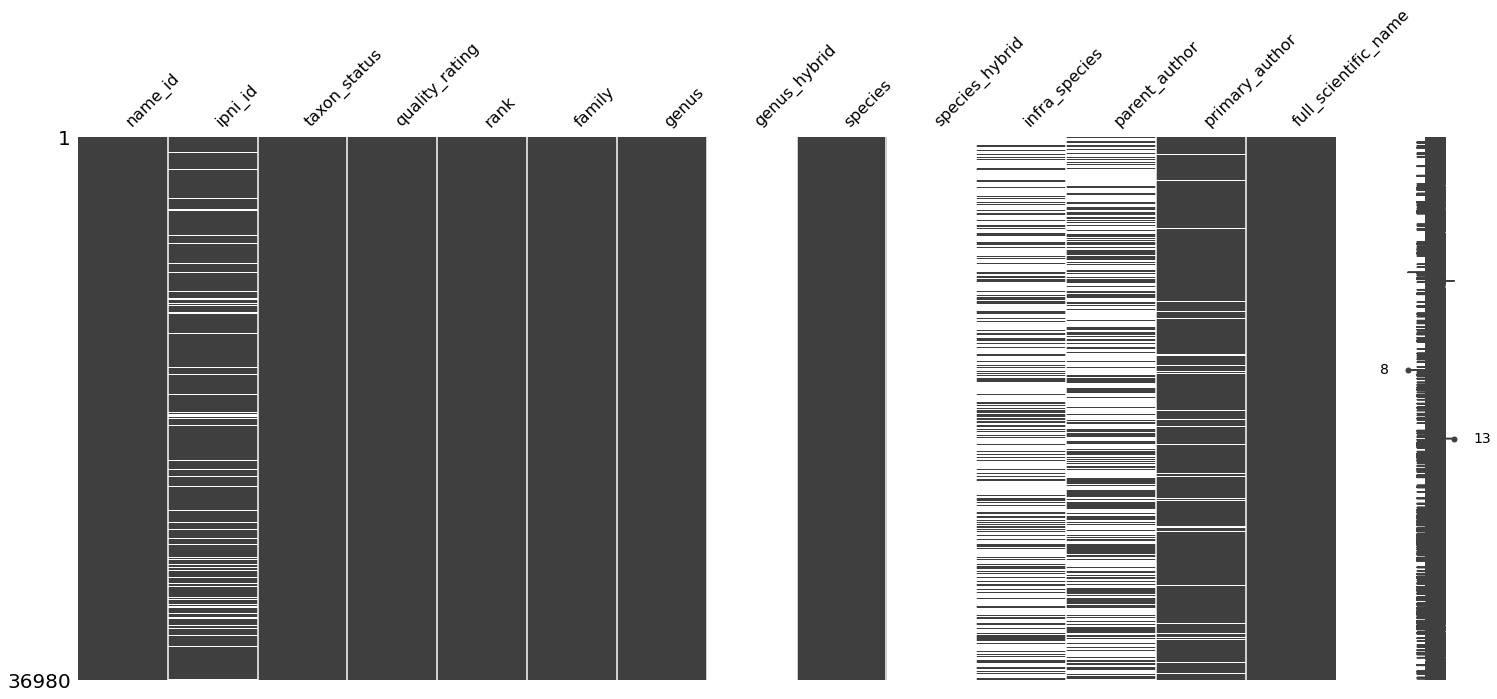

In [88]:
msno.matrix(mpns_plants_df);

### Proportions of columns

In [78]:
# Proportions of rank
mpns_plants_df["rank"].value_counts()

species        25905
var.            5698
subsp.          5144
f.               197
nothosubsp.       28
nothovar.          4
subvar.            3
Name: rank, dtype: int64

In [77]:
# Proportions of taxon_status
mpns_plants_df["taxon_status"].value_counts()

Accepted             36306
Incomplete             279
Unassessed             254
Unplaced               100
Unplaced Synonym        32
Artificial Hybrid        7
Illegitimate             1
Invalid                  1
Name: taxon_status, dtype: int64

In [84]:
# Proportions of quality_rating
mpns_plants_df["quality_rating"].value_counts()

M    20065
H    15256
L     1659
Name: quality_rating, dtype: int64

## MPNS Synonyms (Table 2)

In [103]:
# Retrieve field names in pipe-delimited csv
mpns_synonyms_filepath = "../../../data/mpns-v8/medicinal_mpns_synonyms.csv"
mpns_synonyms_col_names = retrieve_col_names(filepath=mpns_synonyms_filepath, delimiter="|")

# mpns_synonyms_col_names

Column names:

 - name_id
 - ipni_id
 - taxon_status
 - quality_rating
 - rank
 - genus
 - genus_hybrid
 - species
 - species_hybrid
 - infra_species
 - parent_author
 - primary_author
 - full_scientific_name
 - acc_name_id

In [60]:
mpns_synonyms_df = pd.read_csv(mpns_synonyms_filepath, header=0, sep="|", names=mpns_synonyms_col_names)
mpns_synonyms_df.head(10)

,name_id,ipni_id,taxon_status,quality_rating,rank,genus,genus_hybrid,species,species_hybrid,infra_species,parent_author,primary_author,full_scientific_name,acc_name_id
0,wcs41,337102-1,Synonym,H,species,Aalius,NaN,androgyna,NaN,NaN,L.,Kuntze,Aalius androgyna (L.) Kuntze,wcs498532
1,wcs42,337103-1,Synonym,H,species,Aalius,NaN,assimilis,NaN,NaN,Thwaites,Kuntze,Aalius assimilis (Thwaites) Kuntze,wcs498532
2,wcs43,337104-1,Synonym,H,species,Aalius,NaN,brevipes,NaN,NaN,Müll.Arg.,Kuntze,Aalius brevipes (Müll.Arg.) Kuntze,wcs498526
3,wcs44,337105-1,Synonym,H,species,Aalius,NaN,ceratogynum,NaN,NaN,NaN,Kuntze,Aalius ceratogynum Kuntze,wcs498528
4,wcs45,337106-1,Synonym,H,species,Aalius,NaN,compressa,NaN,NaN,Müll.Arg.,Kuntze,Aalius compressa (Müll.Arg.) Kuntze,wcs498528
5,wcs50,337111-1,Synonym,H,species,Aalius,NaN,oblongifolia,NaN,NaN,Hook.f.,Kuntze,Aalius oblongifolia (Hook.f.) Kuntze,wcs498532
6,wcs51,337112-1,Synonym,H,species,Aalius,NaN,pubescens,NaN,NaN,Hook.f.,Kuntze,Aalius pubescens (Hook.f.) Kuntze,wcs498528
7,wcs52,337113-1,Synonym,H,species,Aalius,NaN,quadrangularis,NaN,NaN,Müll.Arg.,Kuntze,Aalius quadrangularis (Müll.Arg.) Kuntze,wcs498528
8,wcs53,337114-1,Synonym,H,species,Aalius,NaN,retroversa,NaN,NaN,Wight,Kuntze,Aalius retroversa (Wight) Kuntze,wcs498532
9,wcs55,337116-1,Synonym,H,species,Aalius,NaN,rigida,NaN,NaN,Thwaites,Kuntze,Aalius rigida (Thwaites) Kuntze,wcs498528


In [51]:
mpns_synonyms_df.shape

(257763, 14)

In [52]:
mpns_synonyms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257763 entries, 0 to 257762
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   name_id               257763 non-null  object
 1   ipni_id               164943 non-null  object
 2   taxon_status          257763 non-null  object
 3   quality_rating        257763 non-null  object
 4   rank                  256413 non-null  object
 5   genus                 257763 non-null  object
 6   genus_hybrid          23 non-null      object
 7   species               257744 non-null  object
 8   species_hybrid        2183 non-null    object
 9   infra_species         93060 non-null   object
 10  parent_author         76071 non-null   object
 11  primary_author        255649 non-null  object
 12  full_scientific_name  257763 non-null  object
 13  acc_name_id           257763 non-null  object
dtypes: object(14)
memory usage: 27.5+ MB


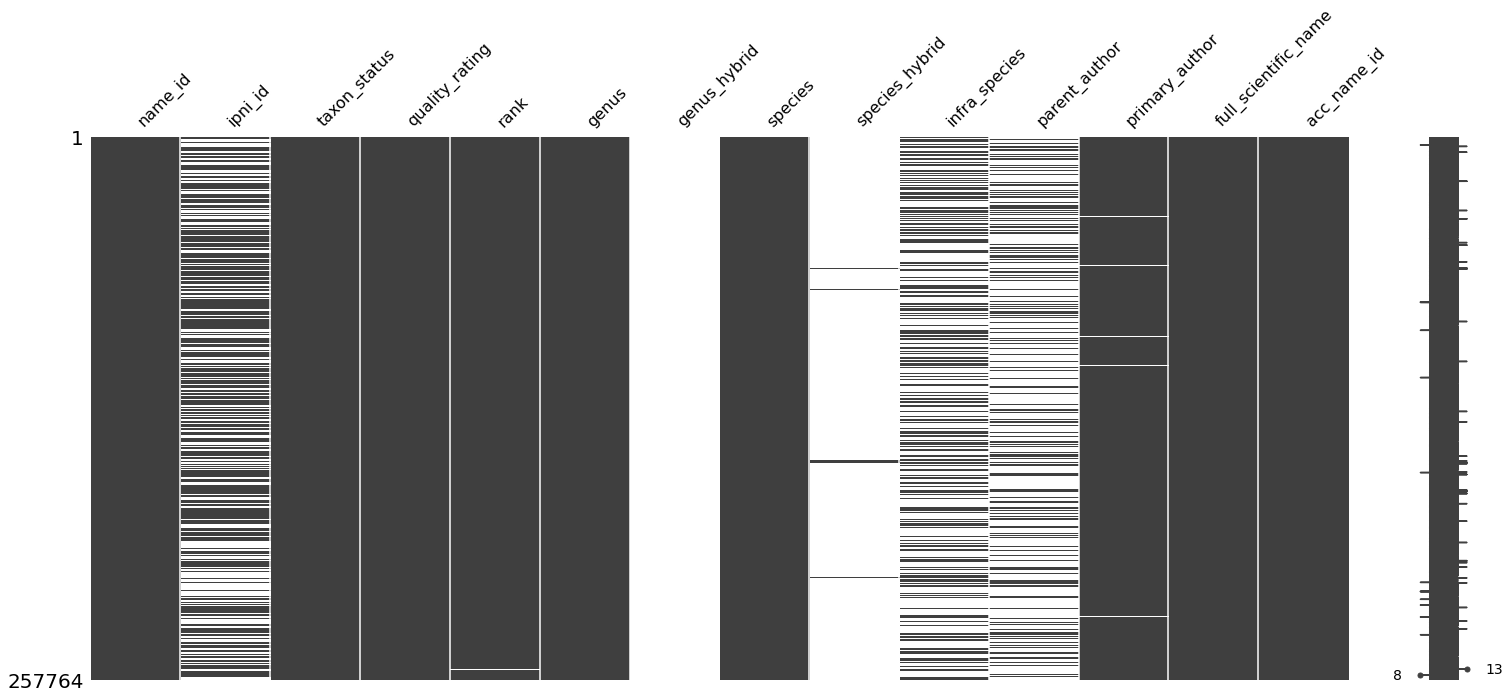

In [89]:
msno.matrix(mpns_synonyms_df);

### Proportions of columns

In [79]:
# Proportions of rank
mpns_synonyms_df["rank"].value_counts()

species        164704
var.            64125
f.              15318
subsp.           9880
subvar.          1232
lusus             299
subf.             286
convar.           161
proles            160
race               82
monstr.            39
nothovar.          32
nothosubsp.        19
microgene          16
stirps             15
raza                9
raçe                7
nothof.             7
grex                7
subproles           4
unterrasse          3
subspecioid         2
rasse               1
subsp               1
raça                1
nid                 1
agamosp.            1
sublusus            1
mut.                1
Name: rank, dtype: int64

In [80]:
# Proportions of taxon_status
mpns_synonyms_df["taxon_status"].value_counts()

Synonym             226867
Illegitimate         12126
Invalid              10593
Incomplete            6940
Orthographic           532
Misapplied             356
Unassessed             337
Unplaced                 8
Unplaced Synonym         5
Name: taxon_status, dtype: int64

In [82]:
# Proportions of quality_rating
mpns_synonyms_df["quality_rating"].value_counts()

M    144679
H    104660
L      8425
Name: quality_rating, dtype: int64

## MPNS Non-Scientific Names (Table 3)

In [104]:
# Retrieve field names in pipe-delimited csv
mpns_non_scientific_names_filepath = "../../../data/mpns-v8/medicinal_mpns_non_scientific_names.csv"
mpns_non_scientific_names_col_names = retrieve_col_names(filepath=mpns_non_scientific_names_filepath, delimiter=";")

# mpns_non_scientific_names_col_names

Column names:

- name_type
- name
- plant_id
- name_id

In [57]:
mpns_non_scientific_names_df = pd.read_csv(mpns_non_scientific_names_filepath, header=0, sep=";", names=mpns_non_scientific_names_col_names)
mpns_non_scientific_names_df.head(10)

,name_type,name,plant_id,name_id
0,common,???,wcsCmp732678,wcsCmp732678
1,common,'!?,wcsCmp999219,wcsCmp613600
2,common,마,wcs240732,wcs240732
3,common,ミ ロバランノキ,wcsCmp431324,wcsCmp431324
4,common,イ エロ－ターミナリア,wcsCmp431324,wcsCmp431324
5,common,เก,wcsCmp499019,wcsCmp499019
6,common,ゴマ,wcsCmp588550,wcsCmp588550
7,common,チモ,wcs299155,wcs299155
8,common,ブシ,wcsCmp618501,wcsCmp618501
9,common,ブシ,wcsCmp618873,wcsCmp618873


In [62]:
mpns_non_scientific_names_df.shape

(120923, 4)

In [63]:
mpns_non_scientific_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120923 entries, 0 to 120922
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   name_type  120923 non-null  object
 1   name       120923 non-null  object
 2   plant_id   120923 non-null  object
 3   name_id    120923 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [91]:
# msno.matrix(mpns_non_scientific_names_df);

### Proportions of columns

In [83]:
# Proportions of name_type
mpns_non_scientific_names_df["name_type"].value_counts()

common                 77286
sci_cited_medicinal    41242
pharmaceutical          2395
Name: name_type, dtype: int64

In [94]:
mpns_non_scientific_names_df[mpns_non_scientific_names_df["name_type"] == "common"]

,name_type,name,plant_id,name_id
0,common,???,wcsCmp732678,wcsCmp732678
1,common,'!?,wcsCmp999219,wcsCmp613600
2,common,마,wcs240732,wcs240732
3,common,ミ ロバランノキ,wcsCmp431324,wcsCmp431324
4,common,イ エロ－ターミナリア,wcsCmp431324,wcsCmp431324
...,...,...,...,...
120918,common,龙胆,wcsCmp821457,wcsCmp821457
120919,common,龙胆草,wcsCmp820298,wcsCmp821379
120920,common,龙芽草,wcsCmp901782,wcsCmp901782
120921,common,龙葵子,wcsCmp915955,wcsCmp915955


In [98]:
mpns_non_scientific_names_df["name_id"].value_counts()[:5]

wcs317427       282
wcsCmp539801    220
wcs178867       219
wcsCmp774037    218
wcsCmp667002    199
Name: name_id, dtype: int64

In [99]:
mpns_non_scientific_names_df[mpns_non_scientific_names_df["name_id"] == "wcs317427"]

,name_type,name,plant_id,name_id
641,common,abilu,wcs317427,wcs317427
820,common,abu shutor,wcs317427,wcs317427
821,common,abu sidra,wcs317427,wcs317427
3040,common,african sausage tree,wcs317427,wcs317427
4394,common,alamborodar,wcs317427,wcs317427
...,...,...,...,...
115746,common,wurstbaum,wcs317427,wcs317427
116435,common,yago,wcs317427,wcs317427
117275,common,yirlahi,wcs317427,wcs317427
117528,common,yumba,wcs317427,wcs317427
